In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
heart_df = pd.read_csv("heart.dat", sep=' ', header=None)
heart_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [3]:
heart_df.columns = ["age", "sex", "chest pain type (4 values)", "resting blood pressure", "serum cholesterol in mg/dl", "fasting blood sugar > 120 mg/dl", " resting electrocardiographic results (values 0,1,2)", "maximum heart rate achieved", "exercise induced angina", "oldpeak = ST depression induced by exercise relative to rest", "the slope of the peak exercise ST segment", "number of major vessels (0-3) colored by flourosopy", "thal: 3 = normal; 6 = fixed defect; 7 = reversable defect", "Absence (1) or presence (2)"]

In [4]:
heart_df.head ()

,age,sex,chest pain type (4 values),resting blood pressure,serum cholesterol in mg/dl,fasting blood sugar > 120 mg/dl,"resting electrocardiographic results (values 0,1,2)",maximum heart rate achieved,exercise induced angina,oldpeak = ST depression induced by exercise relative to rest,the slope of the peak exercise ST segment,number of major vessels (0-3) colored by flourosopy,thal: 3 = normal; 6 = fixed defect; 7 = reversable defect,Absence (1) or presence (2)
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [5]:
heart_df.shape
# There are 270 observations. This means that your neural network will have an input data of shape 270 x 13, 
# excluding the target variable

(270, 14)

In [6]:
# Next, you can check for missing values and also the data types. 
# A Neural Network expects all features to be numeric and not contain missing values.
heart_df.isna().sum()

age                                                             0
sex                                                             0
chest pain type (4 values)                                      0
resting blood pressure                                          0
serum cholesterol in mg/dl                                      0
fasting blood sugar > 120 mg/dl                                 0
 resting electrocardiographic results (values 0,1,2)            0
maximum heart rate achieved                                     0
exercise induced angina                                         0
oldpeak = ST depression induced by exercise relative to rest    0
the slope of the peak exercise ST segment                       0
number of major vessels (0-3) colored by flourosopy             0
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect       0
Absence (1) or presence (2)                                     0
dtype: int64

In [7]:
heart_df.dtypes

age                                                             float64
sex                                                             float64
chest pain type (4 values)                                      float64
resting blood pressure                                          float64
serum cholesterol in mg/dl                                      float64
fasting blood sugar > 120 mg/dl                                 float64
 resting electrocardiographic results (values 0,1,2)            float64
maximum heart rate achieved                                     float64
exercise induced angina                                         float64
oldpeak = ST depression induced by exercise relative to rest    float64
the slope of the peak exercise ST segment                       float64
number of major vessels (0-3) colored by flourosopy             float64
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect       float64
Absence (1) or presence (2)                                     

In [8]:
# Convert imput to numpy arrays
X = heart_df.drop(columns=['Absence (1) or presence (2)']) # The drop() method removes the specified row or column. 
X

,age,sex,chest pain type (4 values),resting blood pressure,serum cholesterol in mg/dl,fasting blood sugar > 120 mg/dl,"resting electrocardiographic results (values 0,1,2)",maximum heart rate achieved,exercise induced angina,oldpeak = ST depression induced by exercise relative to rest,the slope of the peak exercise ST segment,number of major vessels (0-3) colored by flourosopy,thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [9]:
# Replace target class with 0 and 1 
# 1 means "have heart disease" and 0 means "do not have heart disease"
heart_df['Absence (1) or presence (2)'] = heart_df['Absence (1) or presence (2)'].replace(1, 0)
heart_df['Absence (1) or presence (2)'] = heart_df['Absence (1) or presence (2)'].replace(2, 1)
heart_df['Absence (1) or presence (2)']

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Absence (1) or presence (2), Length: 270, dtype: int64

In [10]:
y_label = heart_df['Absence (1) or presence (2)'].values.reshape(X.shape[0], 1)
y_label

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [11]:
# Split data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size = 0.2, random_state = 2)

In [12]:
# Standardize the dataset
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

Shape of train set is (216, 13)
Shape of test set is (54, 13)
Shape of train label is (216, 1)
Shape of test labels is (54, 1)


In [13]:
class NeuralNet():
    '''
    A two layer neural network
    '''
    def __init__(self, layers = [13,8,1], learning_rate = 0.001, iterations = 100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None                                                               # Input
        self.y = None                                                               # Output

    # Created a function (init_weights) to initialize the weights and biases as random numbers.
    # These weights are initialized from a uniform random distribution and saved to a dictionary called params.
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        # The first weight array (W1) will have dimensions of 13 by 8—this is because you have 13 input features and 8 hidden nodes,
        # while the first bias (b1) will be a vector of size 8 because you have 8 hidden nodes.
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1])         # 13*8
        self.params['b1']  =np.random.randn(self.layers[1],)                        # 8*1
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2])          # 8*1
        self.params['b2'] = np.random.randn(self.layers[2],)                        # 1*1

    # There are many types of activation functions used in deep learning—some popular ones are Sigmoid, ReLU, tanh, Leaky ReLU, and so on. 
    # ReLU (Rectified Linear Unit) is a simple function that compares a value with zero. That is, it will return the value passed to it 
    # if it is greater than zero; otherwise, it returns zero.
    def relu(self,Z):
        '''
        The ReLu activation function is to performs a threshold
        operation to each input element where values less 
        than zero are set to zero.
        '''
        return np.maximum(0,Z)

    def dRelu(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x

    def eta (self, x):
        '''
        If our NN supplies 0 values to log, it will result in infinity, which will affect network training.
        So here, we compare the value, and if it is zero, we replace with an extremely small value
        '''
        ETA = 0.0000000001
        return np.maximum(x, ETA)    

    # You can use a sigmoid function when you have a two-class problem (binary classification), and you can use a function called softmax for multi-class problems.
    def sigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1/(1+np.exp(-Z))

    def entropy_loss(self, y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## Clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        # This means you’re considering the average loss with respect to all the inputs.
        # That is, you’re concerned about the combined loss from all the samples and not the individual losses.
        return loss
    
    def forward_propagation(self):
        '''
        Performs the forward propagation
        '''
        
        # Compute the weighted sum between the input and the first layer's weights and then add the bias: Z1 = (W1 * X) + b
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        # Pass the result through the ReLU activation function: A1 = Relu(Z1)
        A1 = self.relu(Z1)
        # Compute the weighted sum between the output (A1) of the previous step and the second layer's weights—also add the bias: Z2 = (W2 * A1) + b2
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        # Compute the output function by passing the result through a sigmoid function: A2 = sigmoid(Z2)
        yhat = self.sigmoid(Z2)
        # And finally, compute the loss between the predicted output and the true labels: loss(A2, Y)
        loss = self.entropy_loss(self.y, yhat)

        # Save calculated parameters. These values will be used during backpropagation.    
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat, loss

    def back_propagation(self,yhat):
        '''
        Backpropagation is the name given to the process of training a neural network by updating its weights and bias.
        Computes the derivatives and update weights and bias according.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        # Update the weights and bias
        # The learning rate is a value that tells our neural network how big the update should be.
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2

    # Now that you’ve added the lines of code to perform the updates, you’ll create a new function called fit
    # that takes the input (X) and labels (Y) and calls the forward and backpropagation repeatedly for a specified number
    # of iterations:
    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias

        # First, it saves the train and target to the class variable and then initializes the weights and biases by
        # calling the init_weights function. Then, it loops through the specified number of iterations, performs forward
        # and backpropagation, saves the loss.
        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)  

    # To make predictions, you simply make a forward pass on the test data. That is, you use the saved weights and biases
    # from the training phase. 
    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred) 

    
    def acc(self, y, yhat):
        '''
        Calculates the accutacy between the predicted valuea and the truth labels
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()  


In [14]:
nn = NeuralNet() # Create the NN model
nn.fit(Xtrain, ytrain) # Train the model

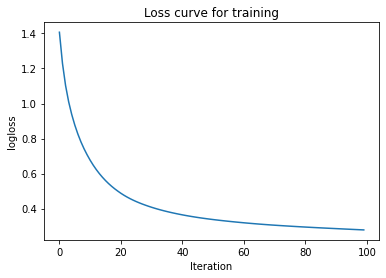

In [15]:
nn.plot_loss()